## Confusion Matrix

<br><br>
<img src="c1.png" style="width:400px;height:300px"/>

Yukarıda confusion matrix tablosunu görmektesiniz. Tabloyu yorumlayalım.

Yan taraftaki sınıflar verinin gerçek değeridir. Üst taraftaki sınıflar ise o verinin tahmin edilen değeridir. 

Tahmin edilen değeri kedi olan ve gerçek değeri kedi olan 35 değer vardır. Bunun anlamı, 35 tane doğru tahmin yapıldığıdır.

Tahmin edilen değeri kedi olan ve gerçek değeri köpek olan 5 değer vardır. Bunun anlamı, 5 tane yanlış tahmin yapıldığıdır.

Tahmin edilen değeri köpek olan ve gerçek değeri kedi olan 15 değer vardır. Bunun anlamı, 15 tane yanlış tahmin yapıldığıdır.

Tahmin edilen değeri köpek olan ve gerçek değeri köpek olan 45 değer vardır. Bunun anlamı, 45 tane doğru tahmin yapıldığıdır.

Dolayısıyla toplamda 45+35=80 tane doğru tahmin yapılmıştır ve 5+15=20 tane yanlış tahmin yapılmıştır.


<br><br>
<img src="c2.png" style="width:400px;height:150px"/>

Yukarıda gördüğünüz gibi, 1000000 tane veri vardır. Bu verilerin 990000 tanesi kedi sınıfa aittir ve 10000 tanesi köpek sınıfına aittir.

Veri setindeki tüm veriler kedi sınıfına ait olarak tahmin edildi varsayalım. Bu durumda 10000 tane köpek sınıfına ait veri yanlış tahmin edilmiştir. 990000 tane veri doğru tahmin edilmiştir. Bu durumda:
    
    990000/10000 = 0.99 
    
    accuracy = %99
    
Aslında 10000 tane veri yanlış tahmin edildi. Fakat veri setindeki sınıflara ait veri sayıları dengesiz (unbalanced) olduğundan dolayı yanlış bir accuracy değeri elde edilmiştir. 10000 sayısı  990000 sayısına göre çok az bir değer olduğundan sınıflara veri sayılarının dengesiz dağılımı söz konusudur. Bu durumda da sadece accuracy değerine bakarsak modelin değerlendirilmesi konusunda yanılabiliriz. Bu yüzden confusion matrix ile modeli değerlendirmemiz daha doğru olur.

<br><br>
<img src="c3.png" style="width:400px;height:300px"/>

<br>
<img src="c4.png" style="width:400px;height:300px"/>

Şimdi sklearn ile confusion matrix kodunu yazalım. Random Forest classification algoritması ile elde edilen modeli confusion matrix ile değerlendirelim.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.drop(["id","Unnamed: 32"],axis=1, inplace=True)  
#id ve Unnamed: 32 sütunlarını tamamen drop edeceğimiz için yani tüm sütunu drop edeceğimiz için axis=1 yapılır.
#Kaldırma işlemini inplace=True parametresi ile veri setine kaydederiz.

In [6]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

In [7]:
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)  #diagnosis çıkarılır ve geri kalan feature'ler x_data feature'sine atanır.

In [8]:
#Normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [9]:
#train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)

rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [11]:
print("random forest algorithm result: ",rf.score(x_test,y_test))

random forest algorithm result:  0.9534883720930233


Random forest ile %95 oranında doğruluk değeri elde ettik. Sınıfların ne kadarını doğru, ne kadarını yanlış tahmin ettik gibi sonuçları elde edebilmek için confusion matrix kullanalım.

In [12]:
y_pred = rf.predict(x_test)
y_true = y_test

#confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[53,  1],
       [ 3, 29]], dtype=int64)

Bu çıktıyı görselleştirerek daha anlaşılır bir görünüm elde edelim.

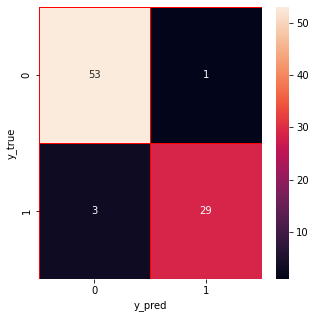

In [13]:
#confusion matrix visualization

import seaborn as sns
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5)) #plotun boyunu ayarlamak için subplots kullandım.
sns.heatmap(cm,annot=True,linewidths=0.5, linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Çıktıyı yorumlayalım.

Toplam 54 tane  iyi huylu tümör verisi vardır. İyi huylu tümör verilerinin 53 tanesi doğru tahmin edilmiştir. Gerçek değeri iyi huylu tümör olup, kötü huylu tümör tahmini yapılan 1 tane sample vardır.

Toplamda kötü huylu 3+29 = 32 tane sample vardır. 32 sample'den 29 tanesi doğru tahmin edilmiştir ve 3 tanesi yanlış tahmin edilmiştir. Yani gerçekte kötü huylu olup, iyi huylu tümör tahmini yapılan 3 tane sample vardır.